#モンテカルロ法の簡単なイメージ

一辺の長さが2の正方形を考えます。そしてさらにこの正方形に内接する半径1の円を考えます。次に、乱数を用いて長方形の内部に点を十分多くランダムにプロットします。

十分多くの点をプロットした場合、円に入った点と長方形内部の全ての点の数の比は円と長方形の面積比$\frac{\pi}{4}$に近づくと考えられます。

このことにより円周率の近似値を求めることができます。

Estimated Pi: 3.1204


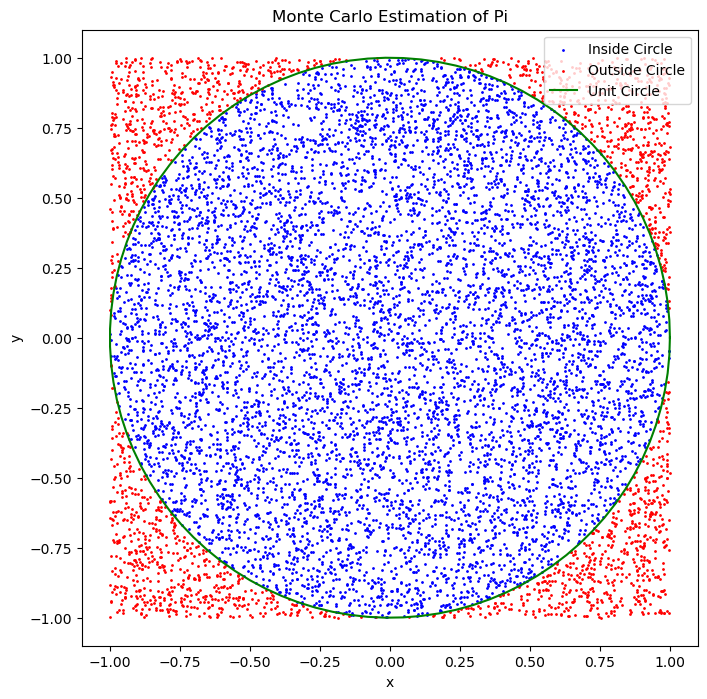

In [4]:
import random
import matplotlib.pyplot as plt
import numpy as np

def estimate_pi(num_samples):
    inside_circle = 0
    inside_x = []
    inside_y = []
    outside_x = []
    outside_y = []
    
    for _ in range(num_samples):
        x = random.uniform(-1, 1)
        y = random.uniform(-1, 1)
        distance = x**2 + y**2
        
        if distance <= 1:
            inside_circle += 1
            inside_x.append(x)
            inside_y.append(y)
        else:
            outside_x.append(x)
            outside_y.append(y)
    
    estimated_pi = (inside_circle / num_samples) * 4
    return estimated_pi, inside_x, inside_y, outside_x, outside_y

num_samples = 10000  # サンプル数を設定
estimated_pi, inside_x, inside_y, outside_x, outside_y = estimate_pi(num_samples)

np.set_printoptions(precision=10)  # 小数点以下の桁数を設定
print(f"Estimated Pi: {estimated_pi}")

theta = np.linspace(0, 2*np.pi, 100)
circle_x = np.cos(theta)
circle_y = np.sin(theta)

plt.figure(figsize=(8, 8))
plt.scatter(inside_x, inside_y, color='blue', label='Inside Circle', s=1)
plt.scatter(outside_x, outside_y, color='red', label='Outside Circle', s=1)
plt.plot(circle_x, circle_y, color='green', label='Unit Circle')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Monte Carlo Estimation of Pi')
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.show()
